# PCM audio quality test

Date: 2023/10/06, 2023/10/07

In [1]:
import numpy as np
import serial
from scipy.io import wavfile
import matplotlib.pyplot as plt
import time
import traceback

PORT = 'COM6'
BAUDRATE = 460800
RAW = b'1'
ENABLE_CONTINOUS_OUTPUT = b'c'
DISABLE_CONTINOUS_OUTPUT = b'C'
ENABLE_PCM_BIT_SHIFT = b'e'
DISABLE_PCM_BIT_SHIFT = b'E'
ENABLE_PRE_EMPHASIS = b'p'
DISABLE_PRE_EMPHASIS = b'P'
Fs = int(80000000 / 64 / 64)
NUM_SAMPLES = 512
NUM_REPEAT = 200

'Fs: {} Hz'.format(Fs)

'Fs: 19531 Hz'

In [2]:
b16_to_int = lambda msb, lsb, signed: int.from_bytes([msb, lsb], byteorder='big', signed=signed)

In [3]:
def fetchPCM(pre_emphasis = True, bit_shift = True):
    try:
        ser.close()
    except:
        print('Already closed')
    
    ser = serial.Serial('COM6', BAUDRATE)
    
    data = []
    
    try:
        ser.write(ENABLE_CONTINOUS_OUTPUT)
        
        if pre_emphasis:
            ser.write(ENABLE_PRE_EMPHASIS)    
        else:
            ser.write(DISABLE_PRE_EMPHASIS)
            
        if bit_shift:
            ser.write(ENABLE_PCM_BIT_SHIFT)
        else:
            ser.write(DISABLE_PCM_BIT_SHIFT)          
        
        ser.write(RAW)
        
        rx = ser.read(NUM_SAMPLES * 2 * NUM_REPEAT)
        rx = zip(rx[0::2], rx[1::2])
        for msb, lsb in rx:
            d = b16_to_int(msb, lsb, True)
            data.append(d)

        ser.write(DISABLE_CONTINOUS_OUTPUT)
        ser.close()
        
    except:
        traceback.print_exc()
        ser.close()
        
    data = np.array(data, dtype=np.int16)
    return data

In [4]:
data1 = fetchPCM(True, True)
time.sleep(2)
data2 = fetchPCM(False, True)

Already closed
Already closed


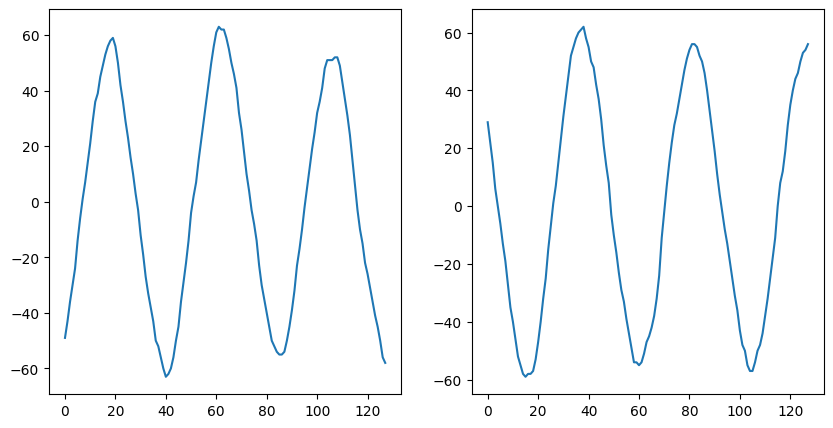

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(data1[0:128])
axes[1].plot(data2[0:128])

In [6]:
wavfile.write('pcm_with_pre_emphasis.wav', Fs, data1)
wavfile.write('pcm_without_pre_emphasis.wav', Fs, data2)